In [1]:
library(Seurat)
library(SeuratWrappers)
library(ggplot2)
library(scales)
library(STACAS)
library(grid)
library(gridExtra)
library(reshape2)
library(lisi)

Attaching SeuratObject



### Load Data

In [22]:
NSCL_NR001_SCRNA_5P_NA_=readRDS("ribas/NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX_final_thresh/NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX_final_thresh_cb.rds")

In [23]:
NSCL_NR001_5pv2_snseq=readRDS("ribas/NSCL-NR001-5pv2-snseq_final_thresh/NSCL-NR001-5pv2-snseq_final_thresh_cb.rds")

In [24]:
NSCL_NR001_SNSEQ_3P_NI_=readRDS("ribas/NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX_final_thresh_cb.rds")

In [25]:
NSCL_NR001_SNSEQ_3P_WI_=readRDS("ribas/NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX_final_thresh_cb.rds")

In [26]:
NSCL_NR001_SNSEQ_5P_NI_=readRDS("ribas/NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX_final_thresh_cb.rds")

In [27]:
NSCL_NR001_SNSEQ_5P_WI_=readRDS("ribas/NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX_final_thresh/NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX_final_thresh_cb.rds")

In [28]:
NSCL_merged <- merge(NSCL_NR001_SCRNA_5P_NA_, 
                     y = c(NSCL_NR001_5pv2_snseq,NSCL_NR001_SNSEQ_3P_NI_,NSCL_NR001_SNSEQ_3P_WI_,NSCL_NR001_SNSEQ_5P_NI_,NSCL_NR001_SNSEQ_5P_WI_), add.cell.ids = c("NSCL_NR001_SCRNA_5P_NA_","NSCL_NR001_5pv2_snseq","NSCL_NR001_SNSEQ_3P_NI_","NSCL_NR001_SNSEQ_3P_WI_","NSCL_NR001_SNSEQ_5P_NI_","NSCL_NR001_SNSEQ_5P_WI_"), project = "NSCL")


In [29]:
genes=read.csv("ribas/NSCL/NSCL_full_hvg_list.csv",header=FALSE)

In [30]:
mat<-as.data.frame(GetAssayData(object = NSCL_merged, slot = "counts"))

In [31]:
NSCL_merged=CreateSeuratObject(mat[unlist(genes),], project = "NSCL", assay = "RNA",meta.data = NSCL_merged@meta.data)


In [32]:
NSCL_merged.list <- SplitObject(NSCL_merged,split.by='orig.ident')

### Raw Control

In [13]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [14]:
NSCL_merged <- ScaleData(NSCL_merged)
NSCL_merged <- RunPCA(NSCL_merged, features = NSCL_merged@assays$RNA@var.features, ndims.print = 1:5, nfeatures.print = 5)

Centering and scaling data matrix

PC_ 1 
Positive:  AC010624.5, AC009554.1, KCNIP4, AC004870.2, CEMIP 
Negative:  RPL32, RPL18, RPS8, RPL19, RPS14 
PC_ 2 
Positive:  IGFBP7, COL4A1, COL4A2, SPARC, SPARCL1 
Negative:  AGR2, TM4SF5, MUC13, NTS, CLDN7 
PC_ 3 
Positive:  IGFBP7, IGFBP2, COL4A2, COL4A1, SPARC 
Negative:  HLA-DPA1, HLA-DPB1, TYROBP, HLA-DRA, FCER1G 
PC_ 4 
Positive:  CD68, C1QC, C1QB, APOE, C1QA 
Negative:  MZB1, DERL3, CD79A, PIM2, JCHAIN 
PC_ 5 
Positive:  VWF, PLVAP, KDR, FLT1, NOTCH4 
Negative:  COL1A2, PDGFRB, COL3A1, COL1A1, EDNRA 



In [15]:
ndim=10
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "pca", dims = 1:ndim, seed.use=123)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:55:30 UMAP embedding parameters a = 0.9922 b = 1.112

22:55:30 Read 33418 rows and found 10 numeric columns

22:55:30 Using Annoy for neighbor search, n_neighbors = 30

22:55:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:55:38 Writing NN index file to temp file /tmp/RtmpWrOZ4n/file1267944343e

22:55:38 Searching Annoy index using 1 thread, search_k = 3000

22:56:09 Annoy recall = 100%

22:56:11 Commencing smooth kNN distance calibration using 1 thread

22:56:15 Initializing fro

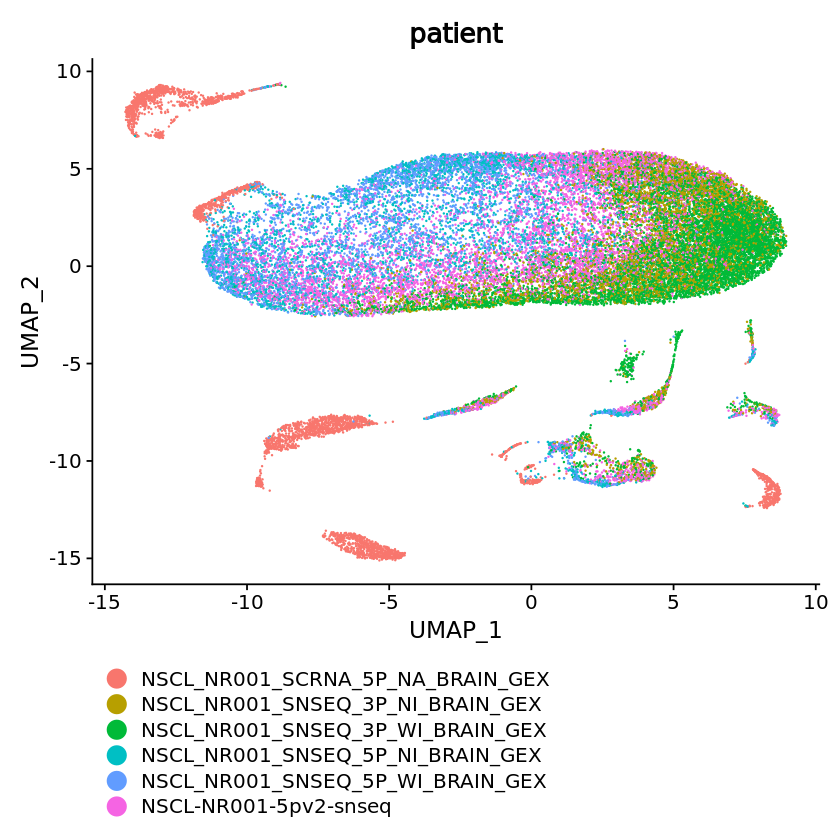

In [16]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


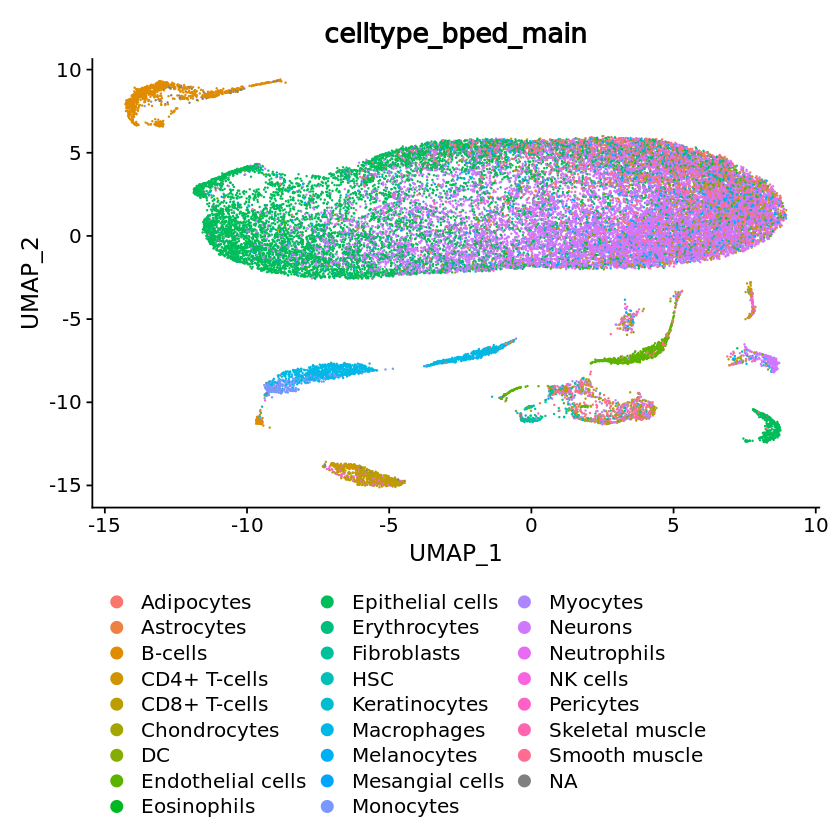

In [17]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [18]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$RNA[c(1:8000)])),rank=20)

In [19]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.534882

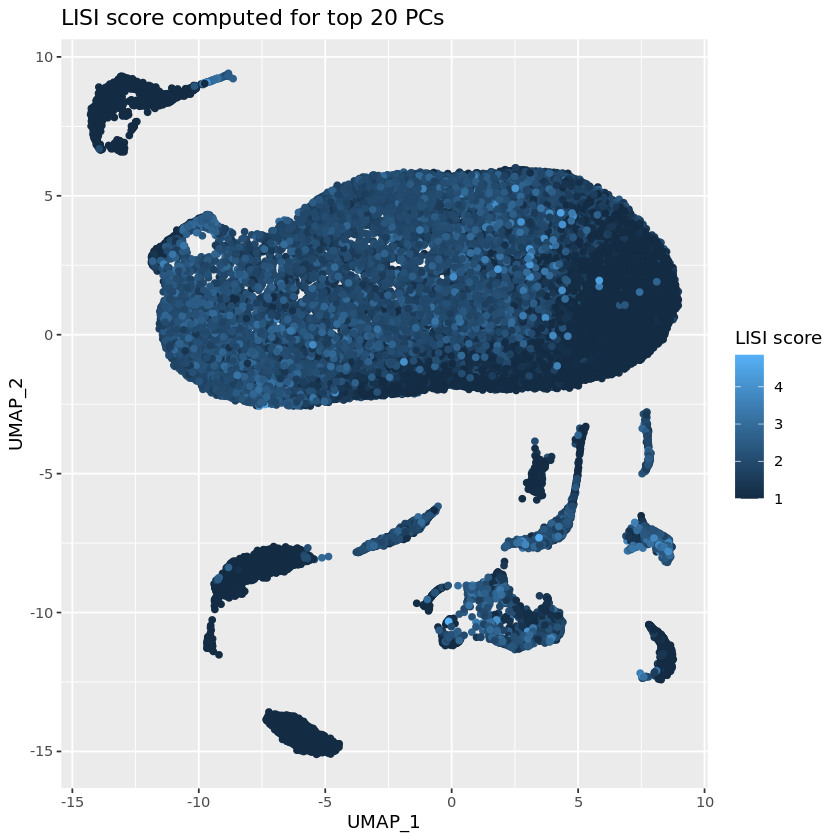

In [20]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [2]:
NSCL_merged=readRDS("ribas/NSCL/NSCL_full_raw_Seurat.rds")

annot=read.csv("ribas/DEGs/NSCL_full_annotations")

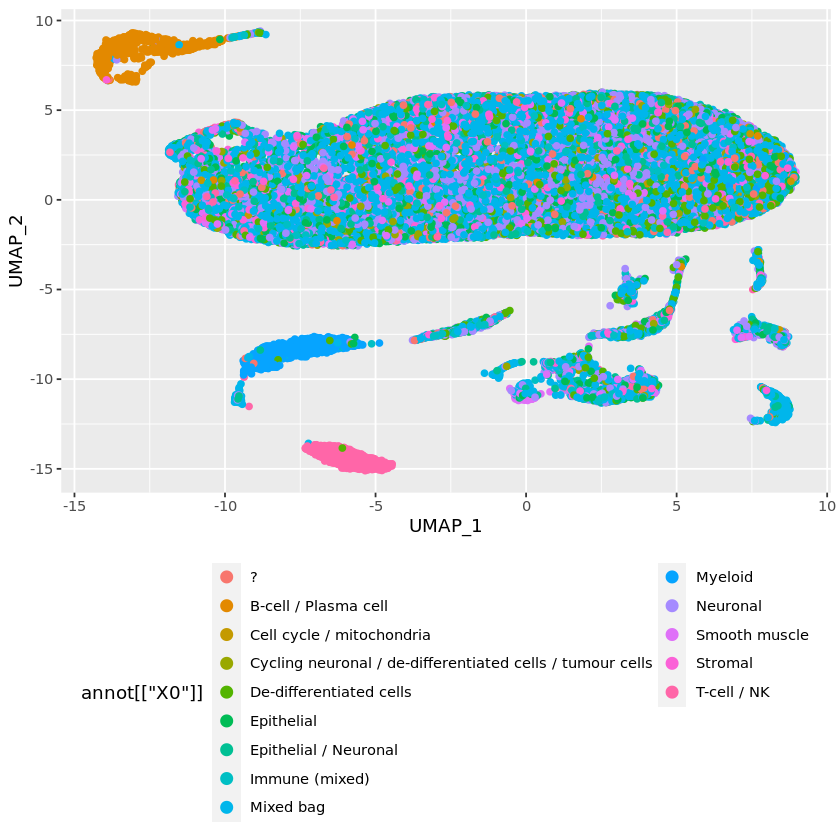

In [3]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### STACAS

In [32]:
var.genes.n <- 800
var.genes.integrated.n <- 500

for (i in 1:length(NSCL_merged.list)) {
    NSCL_merged.list[[i]] <- NormalizeData(NSCL_merged.list[[i]], verbose = FALSE)
    
    NSCL_merged.list[[i]] <- FindVariableFeatures(NSCL_merged.list[[i]], selection.method = "vst", 
        nfeatures = var.genes.n*2, verbose = FALSE)
    
    #mito.genes <- grep(pattern = "^mt-", rownames(ref.list[[i]]), value = TRUE)
    #ribo.genes <- grep(pattern = "^Rp[ls]", rownames(ref.list[[i]]), value = TRUE)
    
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, cellCycle.symbol)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, mito.genes)
    #ref.list[[i]]@assays$RNA@var.features <- setdiff(ref.list[[i]]@assays$RNA@var.features, ribo.genes)
    NSCL_merged.list[[i]]@assays$RNA@var.features <- head( NSCL_merged.list[[i]]@assays$RNA@var.features, var.genes.n)
}

In [33]:
ndim=10
ref.anchors <- FindAnchors.STACAS(NSCL_merged.list, dims=1:ndim, anchor.features=var.genes.integrated.n)

Computing 500 integration features

Preparing PCA embeddings for objects...



 1/6 2/6 3/6 4/6 5/6 6/6


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 449 anchors

Finding neighborhoods

Finding anchors

	Found 493 anchors

Finding neighborhoods

Finding anchors

	Found 7446 anchors

Finding neighborhoods

Finding anchors

	Found 445 anchors

Finding neighborhoods

Finding anchors

	Found 6842 anchors

Finding neighborhoods

Finding anchors

	Found 9082 anchors

Finding neighborhoods

Finding anchors

	Found 753 anchors

Finding neighborhoods

Finding anchors

	Found 6851 anchors

Finding neighborhoods

Finding anchors

	Found 4322 anchors

Finding neighborhoods

Finding anchors

	Found 4025 anchors

Finding neighborhoods

Finding anchors

	Found 677 anchors

Finding neighborhoods

Finding anchors

	Found 6763 anchors

Finding neighborhoods

Finding anchors

	Found 4141 anchors

Finding neighborhoods

Finding anchors

	Found 3954 anchors

Finding neighborhoods

Finding anchors

	Found 6919 anchors



In [34]:
names <- names(NSCL_merged.list)

plots <- PlotAnchors.STACAS(ref.anchors, obj.names=names)

g.cols <- 2
g.rows <- as.integer((length(plots)+2)/g.cols)
g <- do.call("arrangeGrob", c(plots, ncol=g.cols, nrow=g.rows))

Picking joint bandwidth of 0.0356

Picking joint bandwidth of 0.0172

Picking joint bandwidth of 0.0186

Picking joint bandwidth of 0.0203

Picking joint bandwidth of 0.0161

Picking joint bandwidth of 0.0161



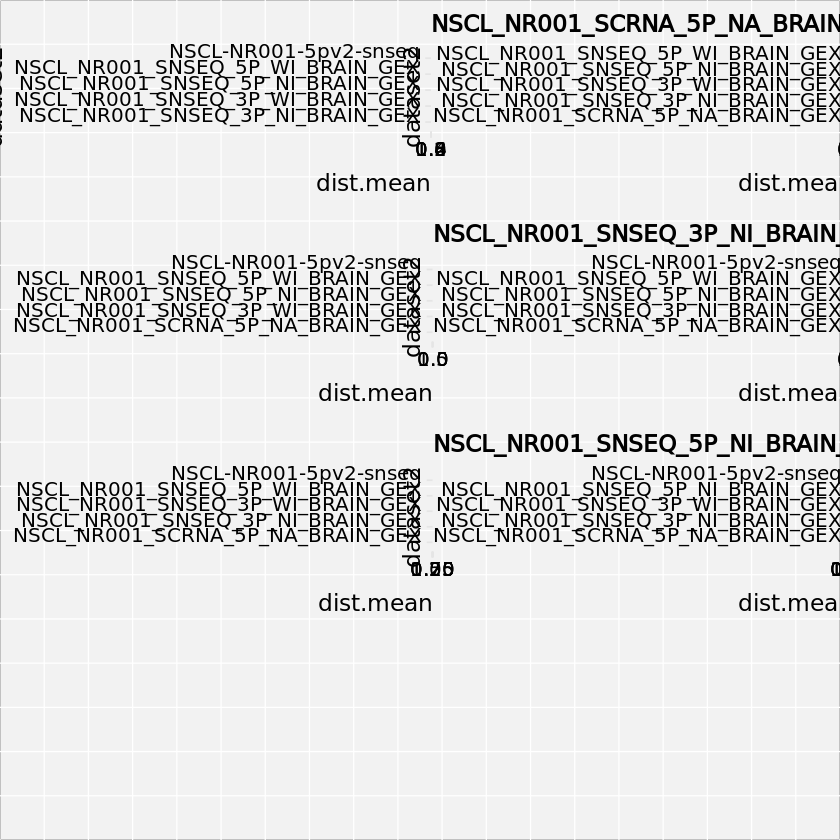

In [35]:
plot(g,combine=FALSE)

In [36]:
ref.anchors.filtered <- FilterAnchors.STACAS(ref.anchors)

Filter anchors using distance threshold t=0.937



In [37]:
#Before
anchor.stats.before <- table(ref.anchors@anchors[,c("dataset1","dataset2")])

#After
anchor.stats.after <- table(ref.anchors.filtered@anchors[,c("dataset1","dataset2")])

rownames(anchor.stats.before) <- names(NSCL_merged.list)
colnames(anchor.stats.before) <- names(NSCL_merged.list)
rownames(anchor.stats.after) <- names(NSCL_merged.list)
colnames(anchor.stats.after) <- names(NSCL_merged.list)
anchor.stats.before

                                  dataset2
dataset1                           NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                                0
  NSCL-NR001-5pv2-snseq                                         449
  NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX                              493
  NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX                              445
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                              753
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                              677
                                  dataset2
dataset1                           NSCL-NR001-5pv2-snseq
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                   449
  NSCL-NR001-5pv2-snseq                                0
  NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX                  7446
  NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX                  6842
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                  6851
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                  6763
                                  datas

In [38]:
anchor.stats.after

                                  dataset2
dataset1                           NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                                0
  NSCL-NR001-5pv2-snseq                                         212
  NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX                              206
  NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX                              183
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                              483
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                              452
                                  dataset2
dataset1                           NSCL-NR001-5pv2-snseq
  NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX                   212
  NSCL-NR001-5pv2-snseq                                0
  NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX                  5086
  NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX                  4944
  NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX                  5159
  NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX                  4769
                                  datas

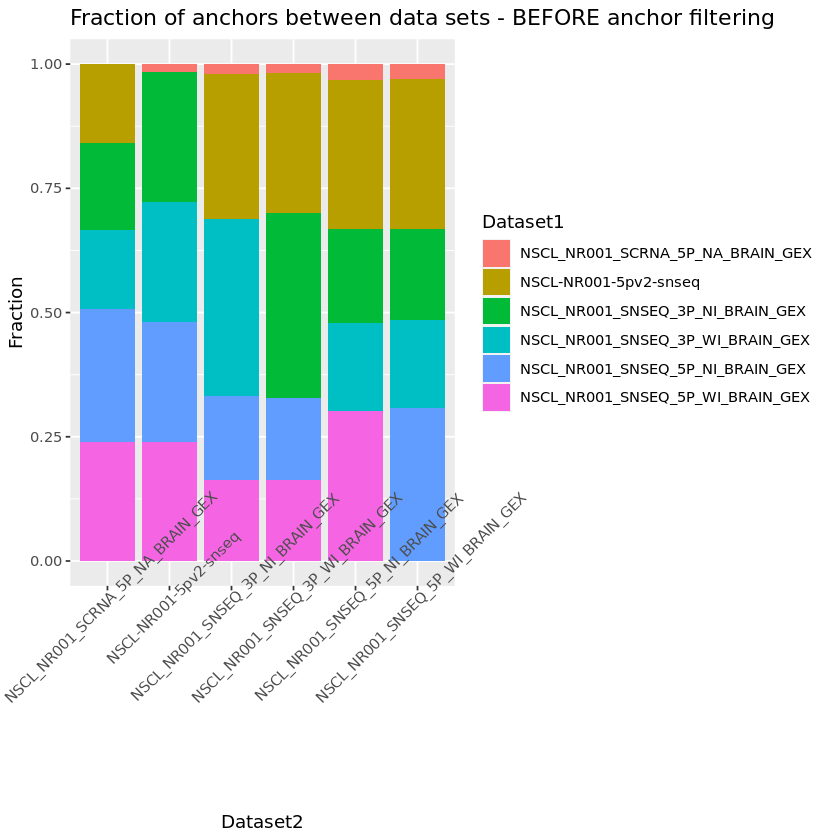

In [39]:
anchor.stats.before.norm <- apply(anchor.stats.before, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.before.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - BEFORE anchor filtering")

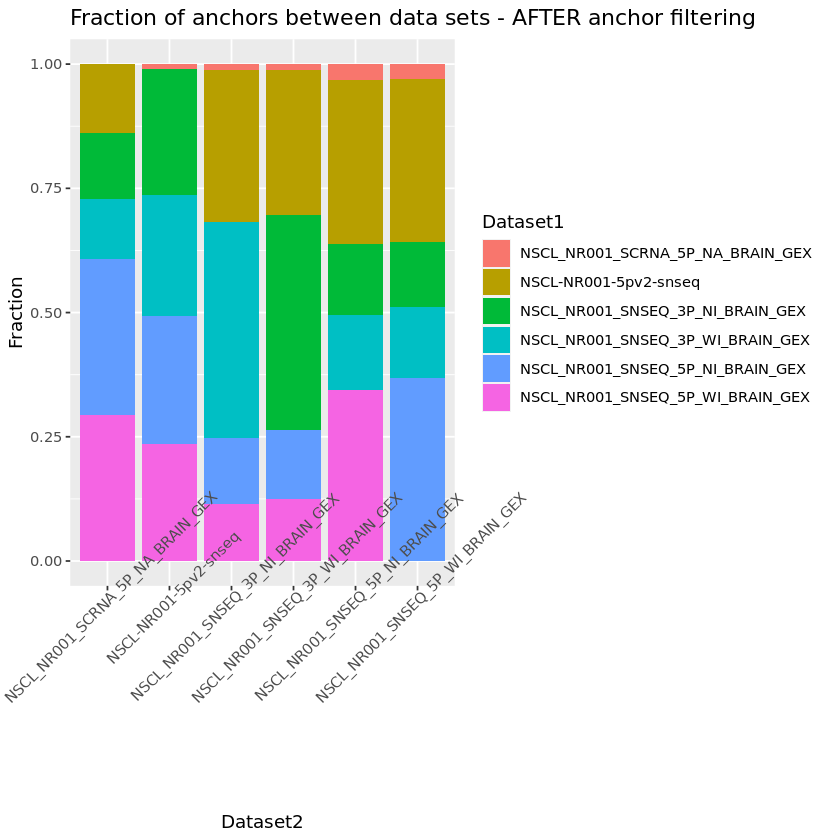

In [40]:
anchor.stats.after.norm <- apply(anchor.stats.after, 1, function(x) {x/sum(x)})
toplot <- melt(anchor.stats.after.norm, varnames=c("Dataset1","Dataset2"), value.name = "Fraction")
ggplot(toplot, aes(fill=Dataset1, y=Fraction, x=Dataset2)) + 
    geom_bar(position="stack", stat="identity") +
  theme(axis.text.x = element_text(angle = 45)) +
    ggtitle("Fraction of anchors between data sets - AFTER anchor filtering")

In [41]:
all.genes <- row.names(NSCL_merged.list[[1]])
for (i in 2:length(NSCL_merged.list)) {
   all.genes <- intersect(all.genes, row.names(NSCL_merged.list[[i]]))
}

mySampleTree <- SampleTree.STACAS(ref.anchors.filtered)
print(mySampleTree)

     [,1] [,2]
[1,]   -5   -6
[2,]   -4   -3
[3,]    1   -2
[4,]    3    2
[5,]    4   -1


In [42]:
ref.integrated <- IntegrateData(anchorset=ref.anchors.filtered, dims=1:ndim, features.to.integrate=all.genes,
                                sample.tree=mySampleTree, preserve.order=T)

Merging dataset 6 into 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 5 6

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 3 into 5 6 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 5 6 2 4 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [43]:
ndim=15
length(ref.integrated@assays$integrated@var.features)

ref.integrated <- ScaleData(ref.integrated, verbose = TRUE)
ref.integrated <- RunPCA(ref.integrated, features = ref.integrated@assays$integrated@var.features,
                         ndims.print = 1:5, nfeatures.print = 5)

ndim=10  #how many PCA components to retain

ref.integrated <- RunUMAP(ref.integrated, reduction = "pca", dims = 1:ndim, seed.use=123, n.neighbors = 30, min.dist=0.3)


[1] 500

Centering and scaling data matrix

PC_ 1 
Positive:  IGFBP7, COL4A1, COL4A2, SPARC, LAMA4 
Negative:  CALCA, CPE, GP2, MUC13, NTS 
PC_ 2 
Positive:  FBXO32, RIMKLB, MT1H, DANT2, KCNIP4 
Negative:  RPLP1, RPL19, RPL8, RPL13, RPS18 
PC_ 3 
Positive:  CALCA, TM4SF5, TFF3, AGR2, PCSK1 
Negative:  RPL34, ADAMTS17, TMSB4X, RPL37A, HLA-DRA 
PC_ 4 
Positive:  VWF, PLVAP, EGFL7, KDR, ID1 
Negative:  ATP10A, PDGFRB, MIR99AHG, COL1A2, RPL34 
PC_ 5 
Positive:  PCDH9, IL1RAPL1, NCAM2, ERBB4, PLP1 
Negative:  RGS5, CARMN, PLXDC1, TRPC6, NOTCH3 

22:00:21 UMAP embedding parameters a = 0.9922 b = 1.112

22:00:21 Read 33418 rows and found 10 numeric columns

22:00:21 Using Annoy for neighbor search, n_neighbors = 30

22:00:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:00:25 Wri

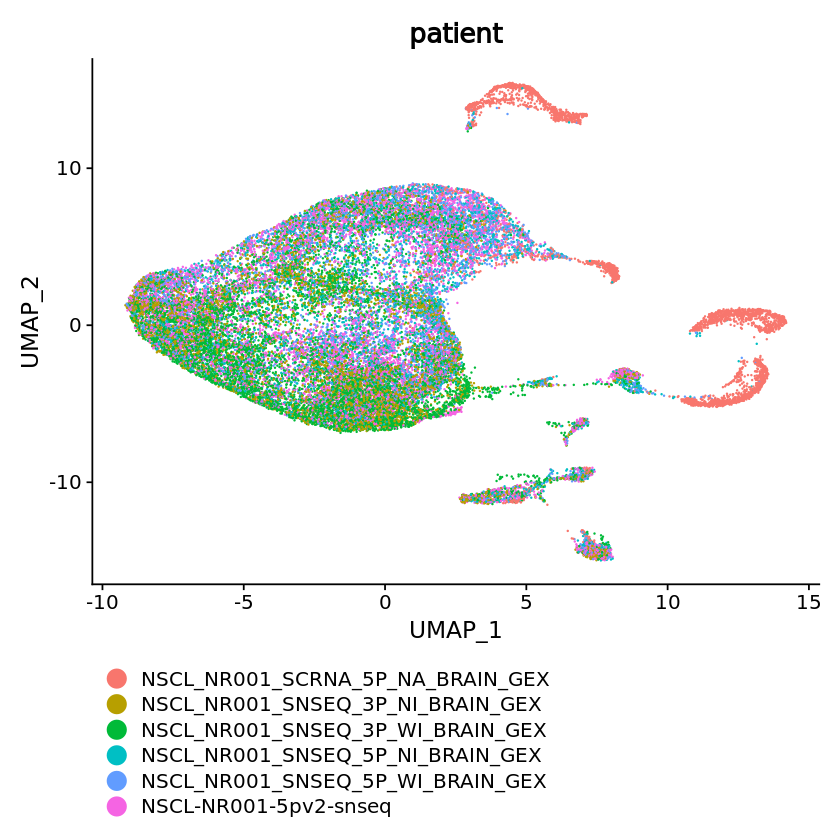

In [44]:
DimPlot(ref.integrated, reduction = "umap", group.by = "patient", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))


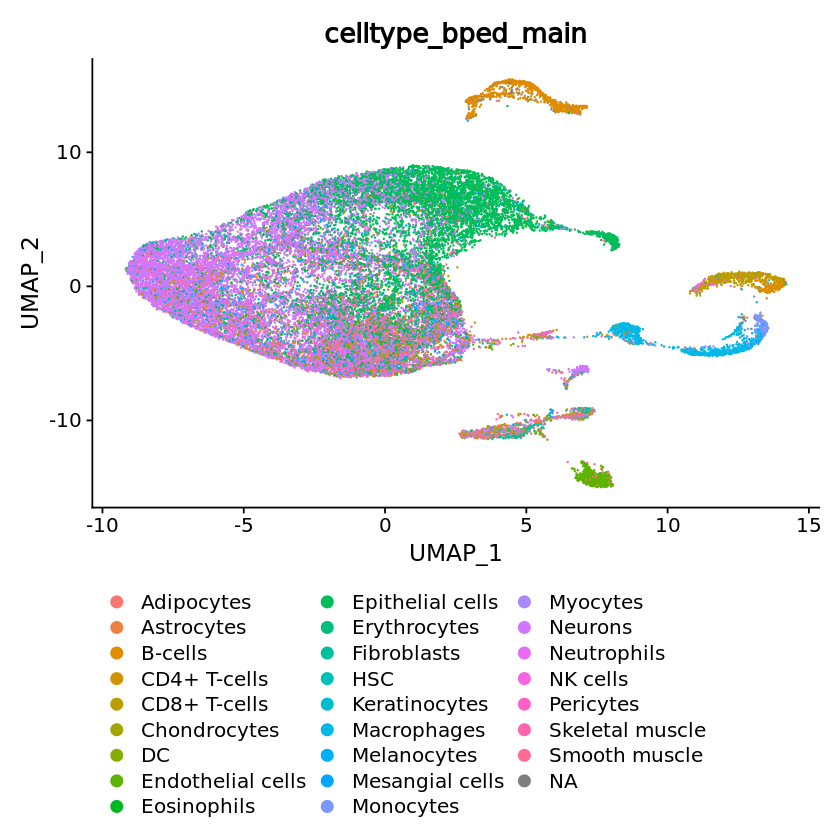

In [45]:
DimPlot(ref.integrated, reduction = "umap", group.by = "celltype_bped_main", shuffle=TRUE) +theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [3]:
pcs=prcomp(t(as.matrix(ref.integrated@assays$integrated[c(1:8000)])),rank=20)

In [5]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(ref.integrated@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.525452

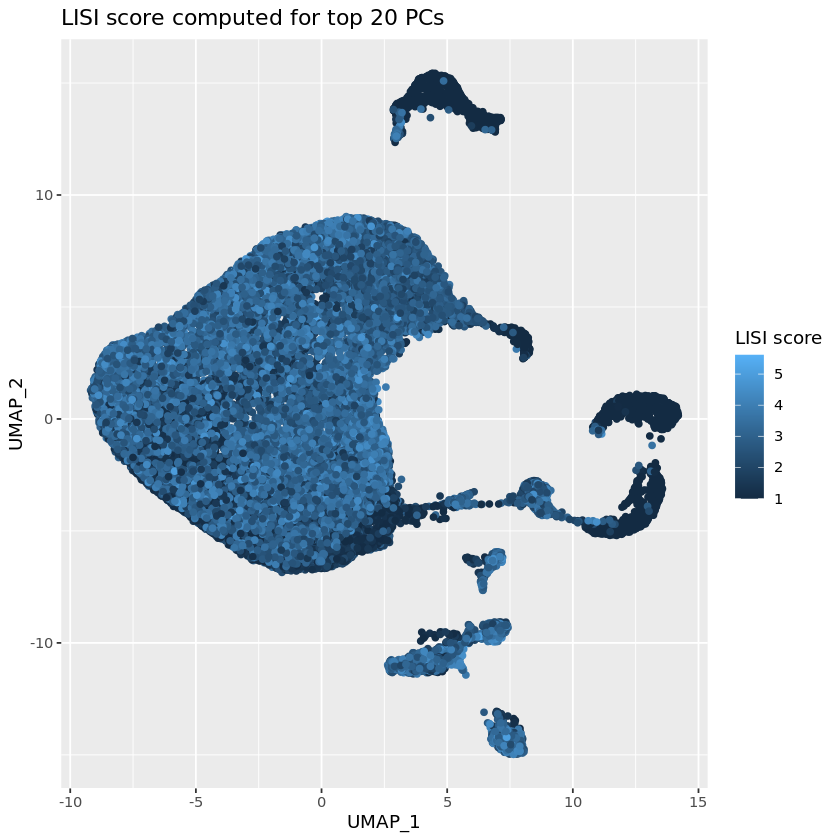

In [6]:
ggplot(as.data.frame(ref.integrated[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [48]:
saveRDS(ref.integrated,"ribas/NSCL/NSCL_full_STACAS_merged.rds")

In [4]:
NSCL_merged=readRDS("ribas/NSCL/NSCL_full_STACAS_merged.rds")

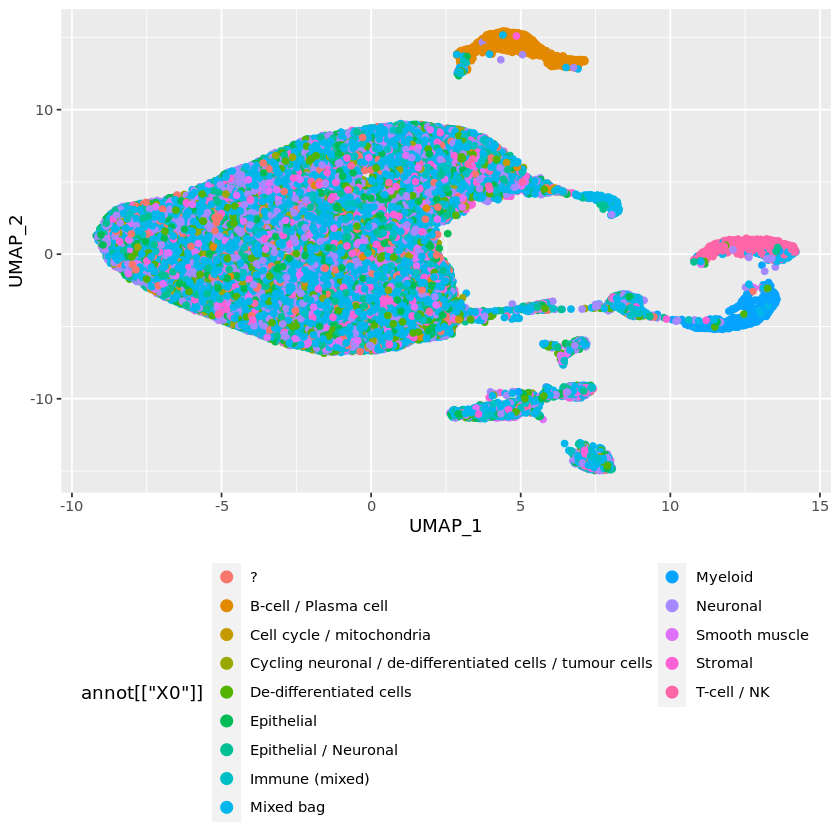

In [5]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### FastMNN

In [33]:
NSCL_merged <- NormalizeData(NSCL_merged)
NSCL_merged <- FindVariableFeatures(NSCL_merged)

In [34]:
NSCL_merged <- RunFastMNN(object.list = SplitObject(NSCL_merged,split.by='orig.ident'),features=rownames(NSCL_merged))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mnn.reconstructed_ to mnnreconstructed_”


In [35]:
NSCL_merged <- RunUMAP(NSCL_merged, reduction = "mnn", dims = 1:30)

23:19:37 UMAP embedding parameters a = 0.9922 b = 1.112

23:19:37 Read 33418 rows and found 30 numeric columns

23:19:37 Using Annoy for neighbor search, n_neighbors = 30

23:19:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:19:44 Writing NN index file to temp file /tmp/RtmpWrOZ4n/file126778875182

23:19:44 Searching Annoy index using 1 thread, search_k = 3000

23:20:03 Annoy recall = 100%

23:20:06 Commencing smooth kNN distance calibration using 1 thread

23:20:10 Initializing from normalized Laplacian + noise

23:20:20 Commencing optimization for 200 epochs, with 1436378 positive edges

23:20:44 Optimization finished



In [36]:
NSCL_merged <- FindNeighbors(NSCL_merged, reduction = "mnn", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [37]:
NSCL_merged <- FindClusters(NSCL_merged)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33418
Number of edges: 1060173

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8783
Number of communities: 26
Elapsed time: 18 seconds


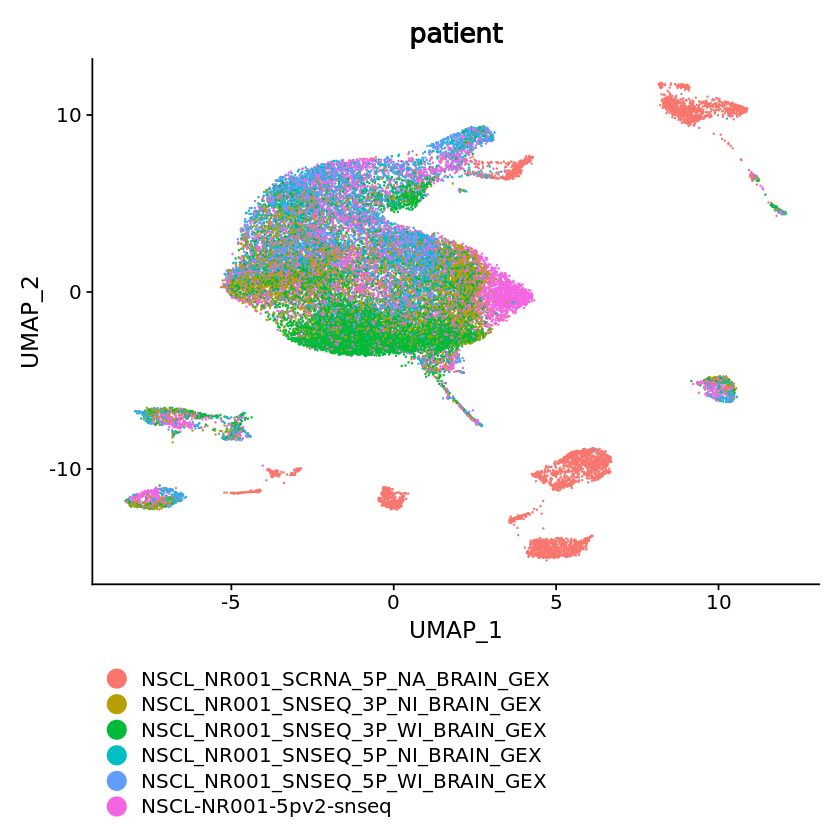

In [38]:
DimPlot(NSCL_merged, group.by = c("patient"), ncol = 1, shuffle=TRUE)+theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 6, override.aes = list(size=5)))



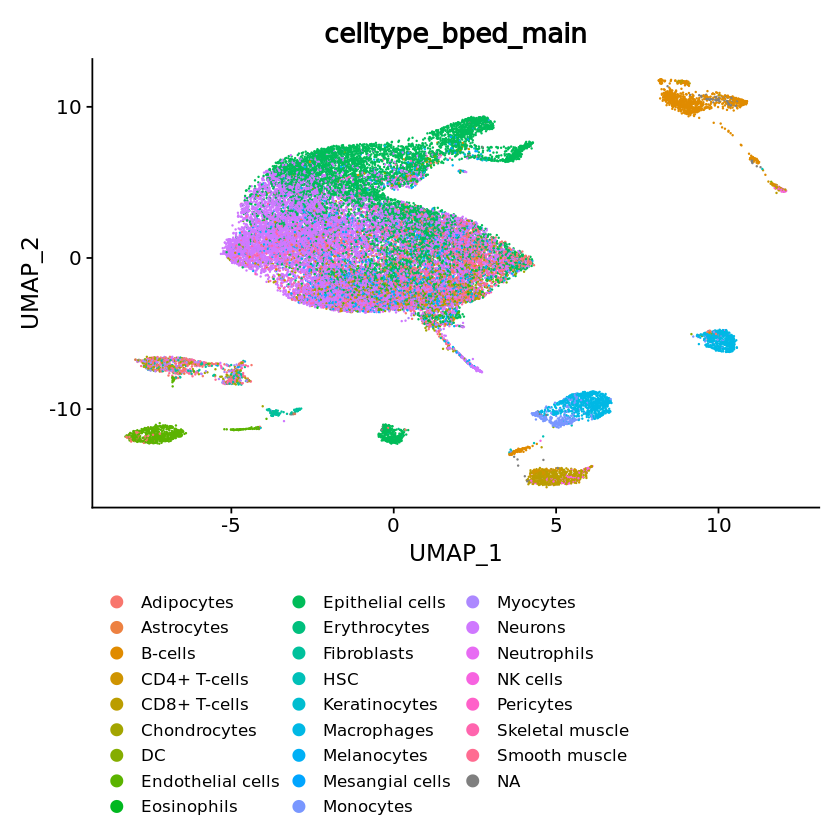

In [39]:
DimPlot(NSCL_merged, group.by = c("celltype_bped_main"), ncol = 1, shuffle=TRUE)+theme(legend.text=element_text(size=10),legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))

In [40]:
pcs=prcomp(t(as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)])),rank=20)

In [41]:
#evaluate batch effect using lisi score

umap_coords=pcs$x

labels <- as.data.frame(NSCL_merged@meta.data$orig.ident)
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.270507

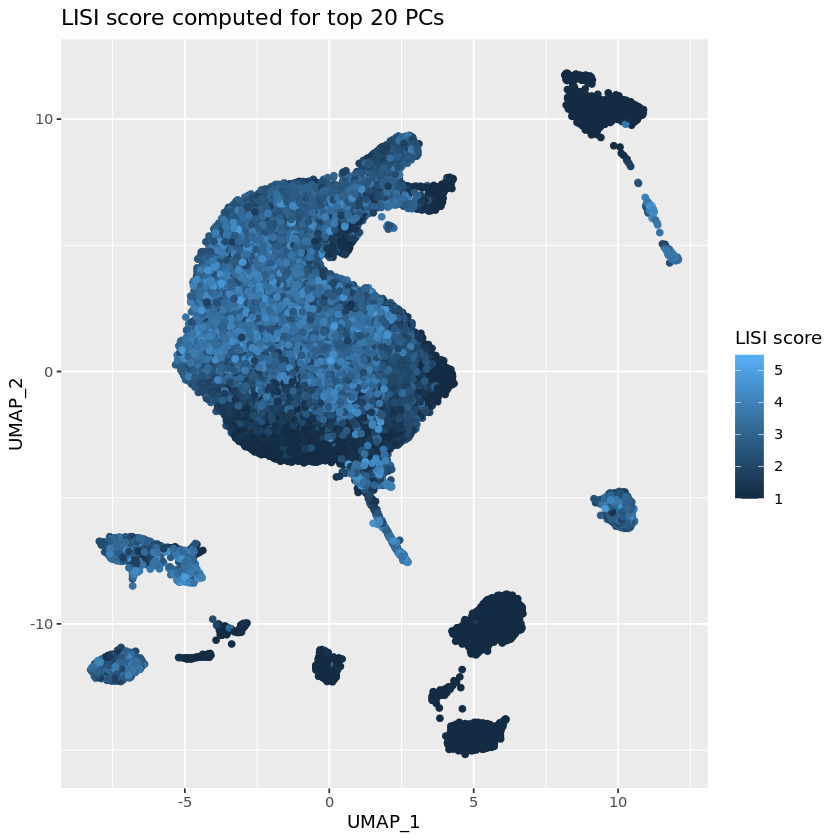

In [42]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") +ggtitle("LISI score computed for top 20 PCs")

In [43]:
saveRDS(NSCL_merged,"ribas/NSCL/NSCL_full_fastMNN.rds")

In [6]:
NSCL_merged=readRDS("ribas/NSCL/NSCL_full_fastMNN.rds")

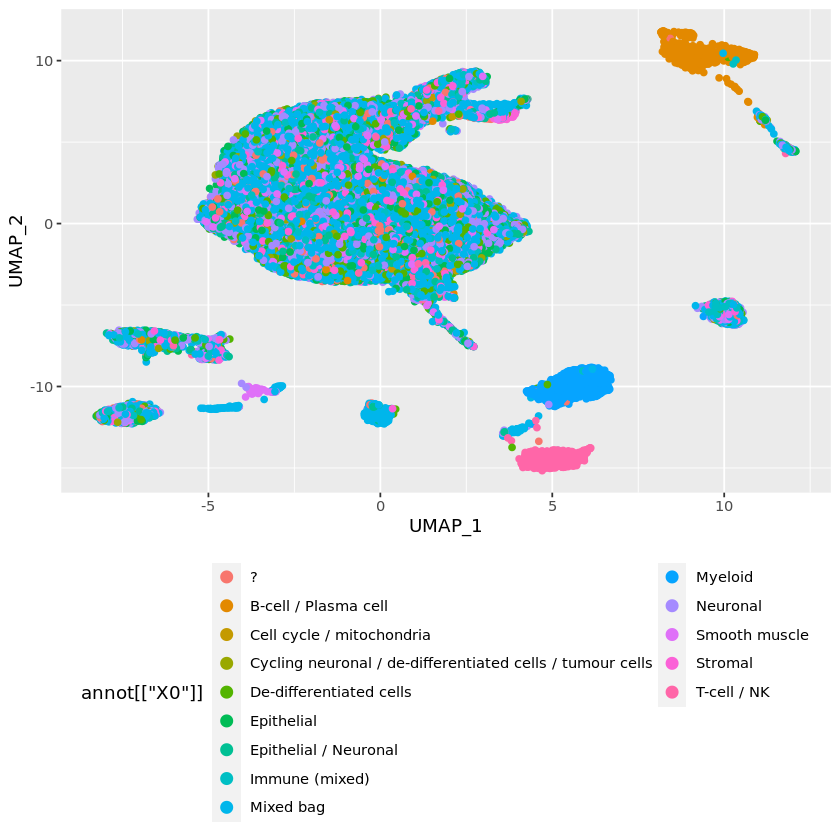

In [7]:
ggplot(as.data.frame(NSCL_merged[["umap"]]@cell.embeddings), aes(x=UMAP_1, y=UMAP_2,color=annot[["X0"]])) + 
  geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### LISI for SCVI and Scanorama

In [7]:
scvi_latent <- read.csv("ribas/NSCL/NSCL_full_scvi_latent_components.csv")

In [8]:
scvi_latent_umap <- read.csv("ribas/NSCL/NSCL_full_scvi_latent_umap.csv")

In [9]:
scvi_cells <- read.csv("ribas/NSCL/NSCL_full_orig.ident.csv")

In [10]:
scvi_dense <- read.csv("ribas/NSCL/NSCL_full_scvi_dense_pcs.csv")

In [9]:
scvi_dense_umap <- read.csv("ribas/NSCL/NSCL_full_scvi_dense_umap.csv")

In [15]:
umap_coords=scvi_latent[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","X26","X27","X28","X29")]

labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.376659

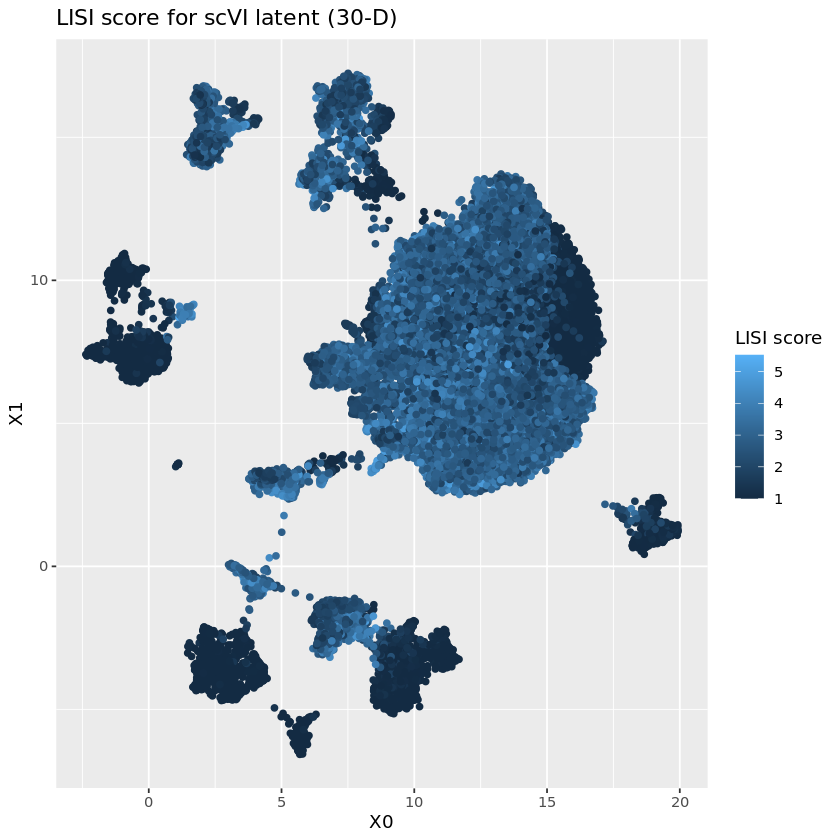

In [16]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") + ggtitle("LISI score for scVI latent (30-D)")

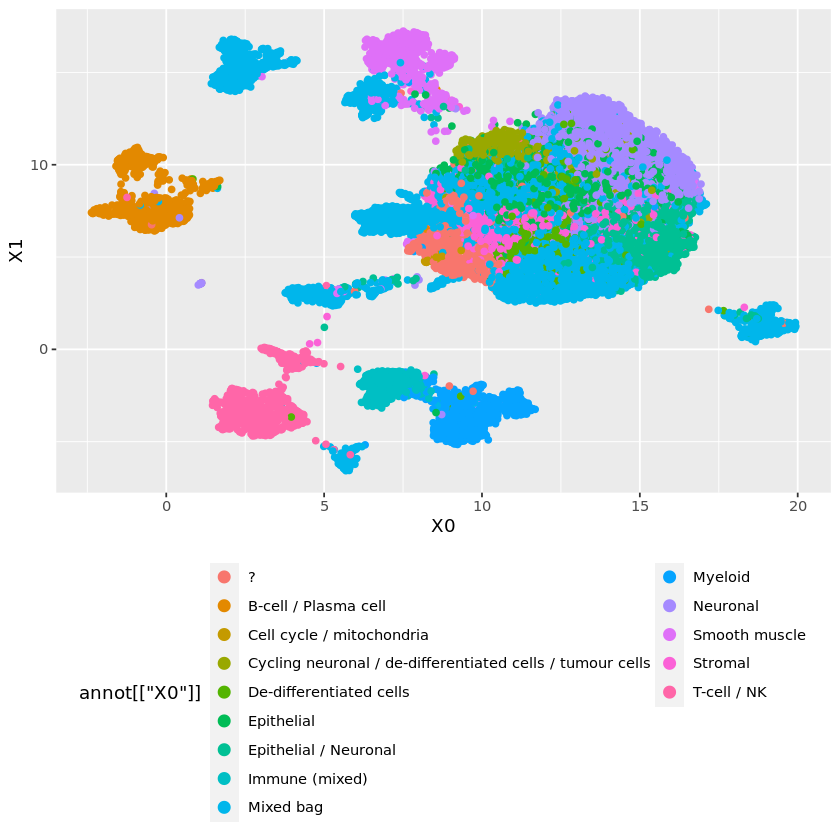

In [10]:
ggplot(scvi_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [52]:
umap_coords=scvi_dense[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]


labels <- scvi_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.71948

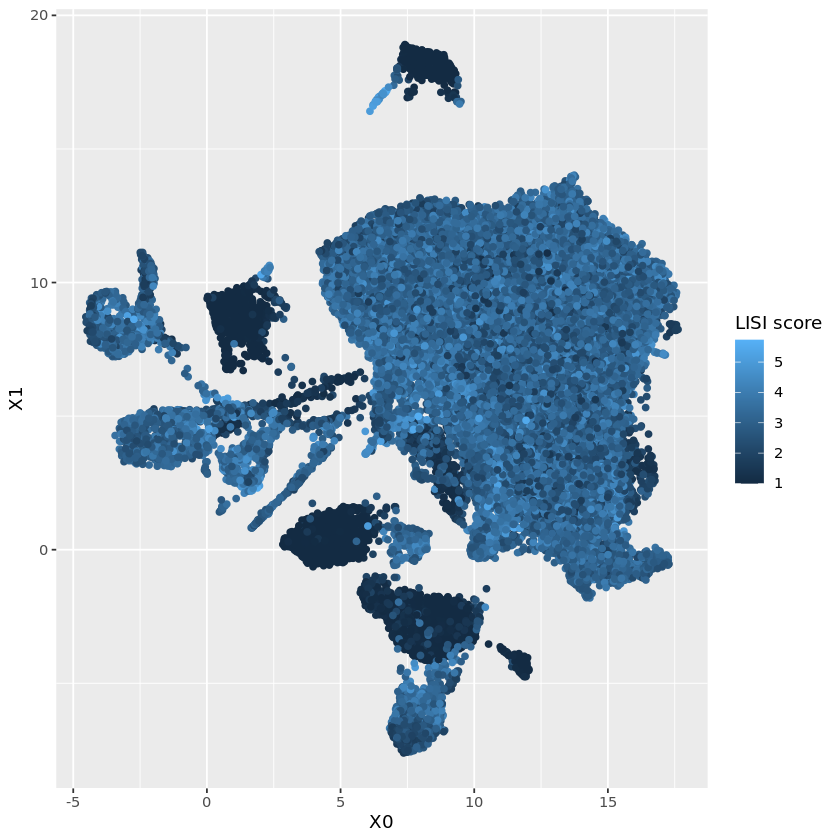

In [53]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


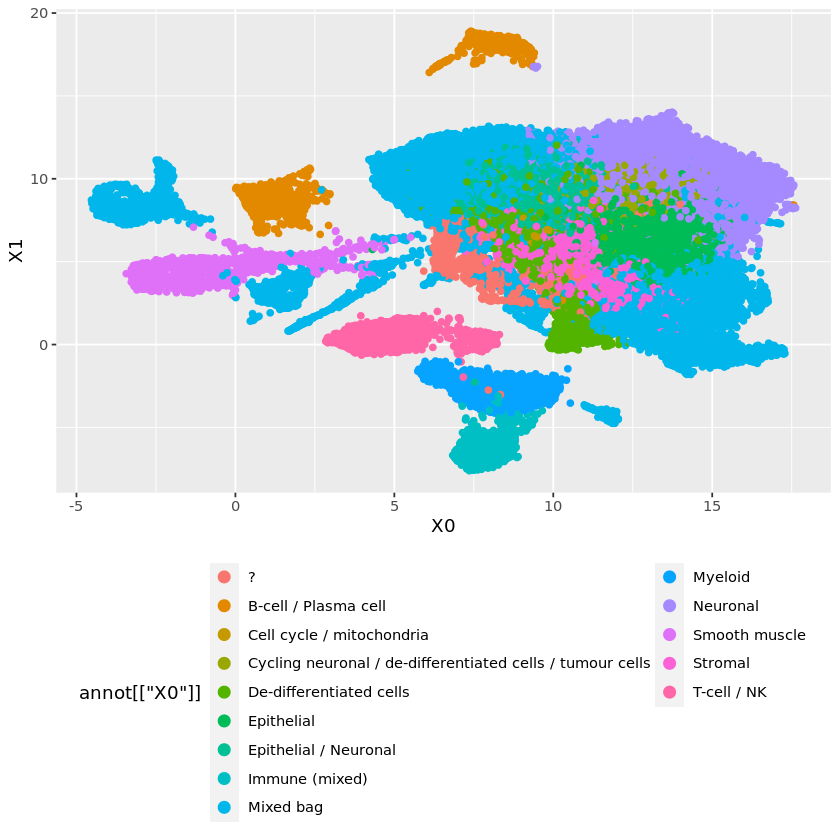

In [11]:
ggplot(scvi_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [13]:
#scano_cells <- read.csv("ribas/NSCL/NSCL_full_orig.ident.csv")
#scano_latent <- read.csv("ribas/NSCL/NSCL_full_scanorama_latent_components.csv")
scano_latent_umap <- read.csv("ribas/NSCL/NSCL_full_scanorama_latent_umap.csv")

In [12]:
tmp <- c()
for (i in 1:99)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

umap_coords=scano_latent[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

ERROR: Error in eval(expr, envir, enclos): object 'scano_latent' not found


In [40]:
umap_coords=scano_latent[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.163828

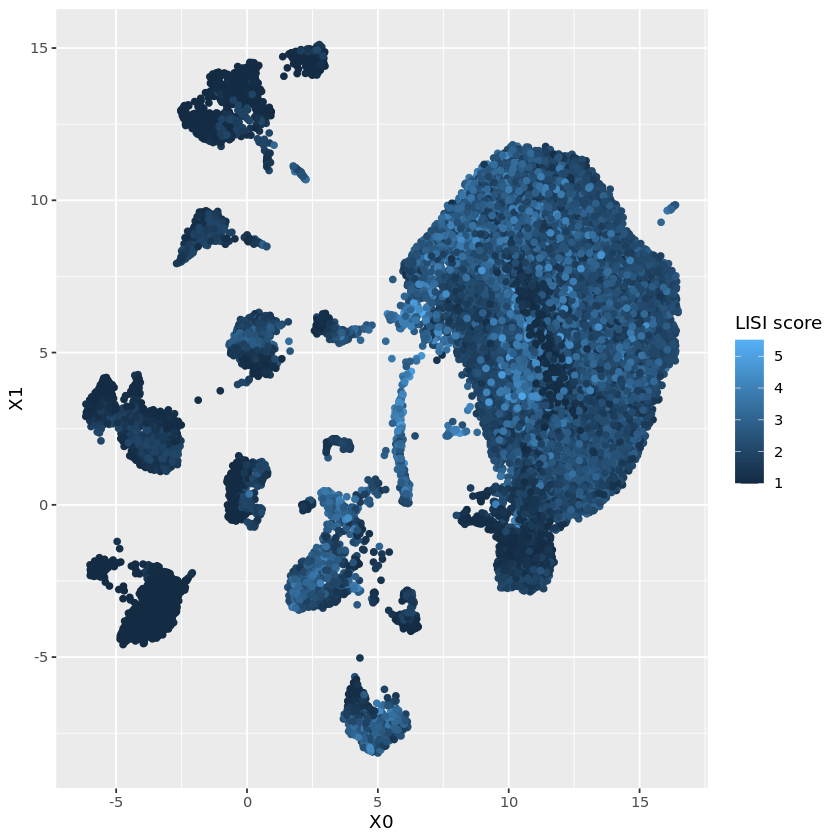

In [41]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


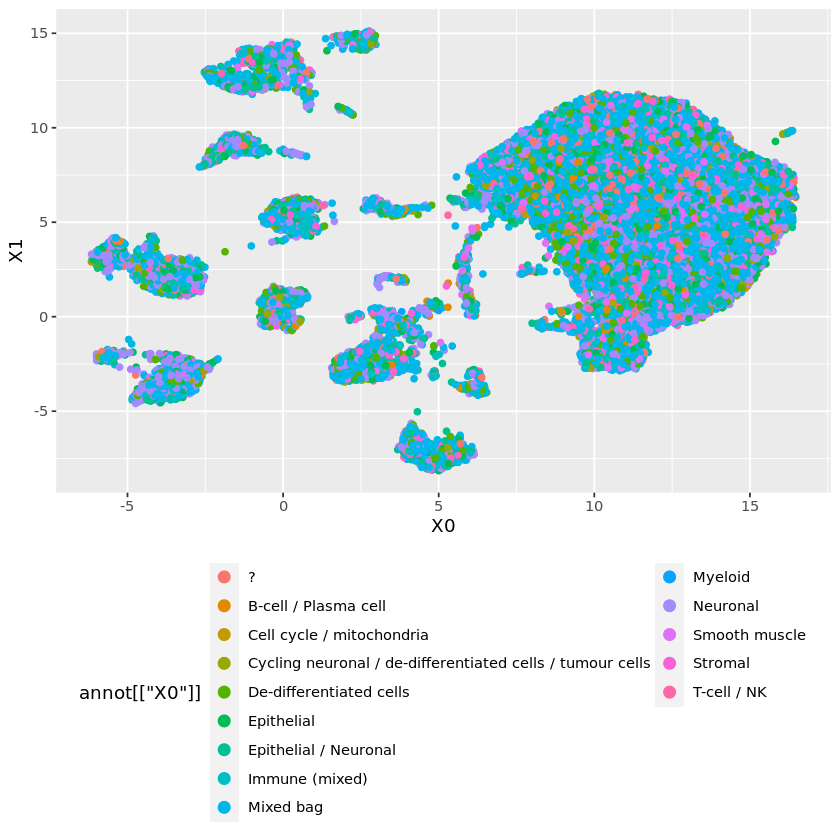

In [14]:
ggplot(scano_latent_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [15]:
#scano_dense <- read.csv("ribas/NSCL/NSCL_full_scanorama_pcs.csv")
scano_dense_umap <- read.csv("ribas/NSCL/NSCL_full_scanorama_dense_umap.csv")

tmp <- c()
for (i in 1:19)
    {
    tmp <- append(tmp, paste("X",toString(i),sep=""))
}

In [47]:
umap_coords=scano_dense[tmp]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 2.163225

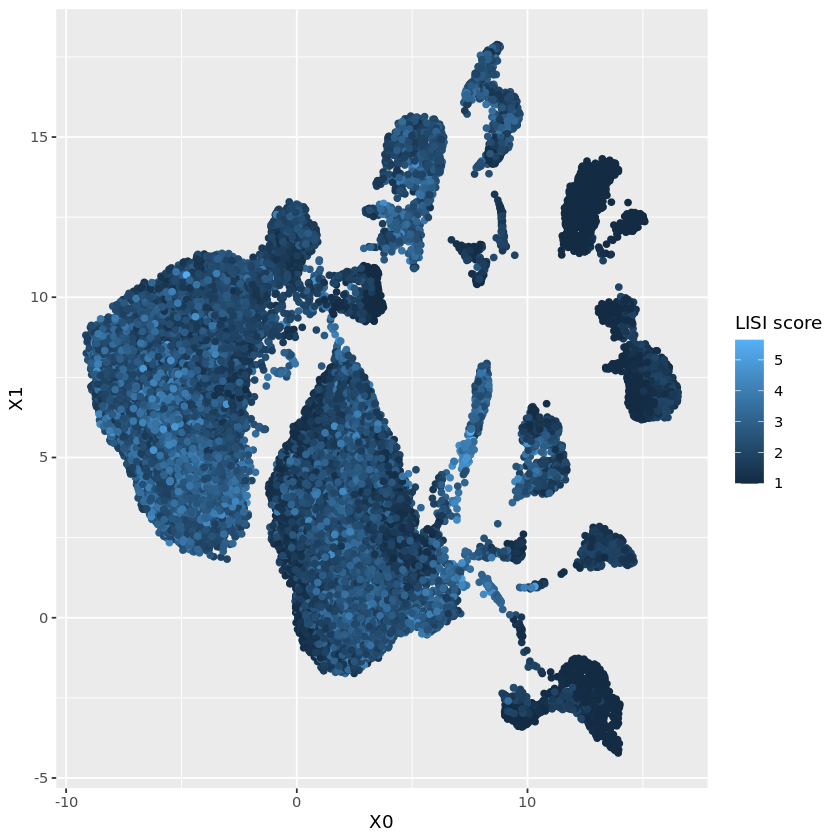

In [48]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


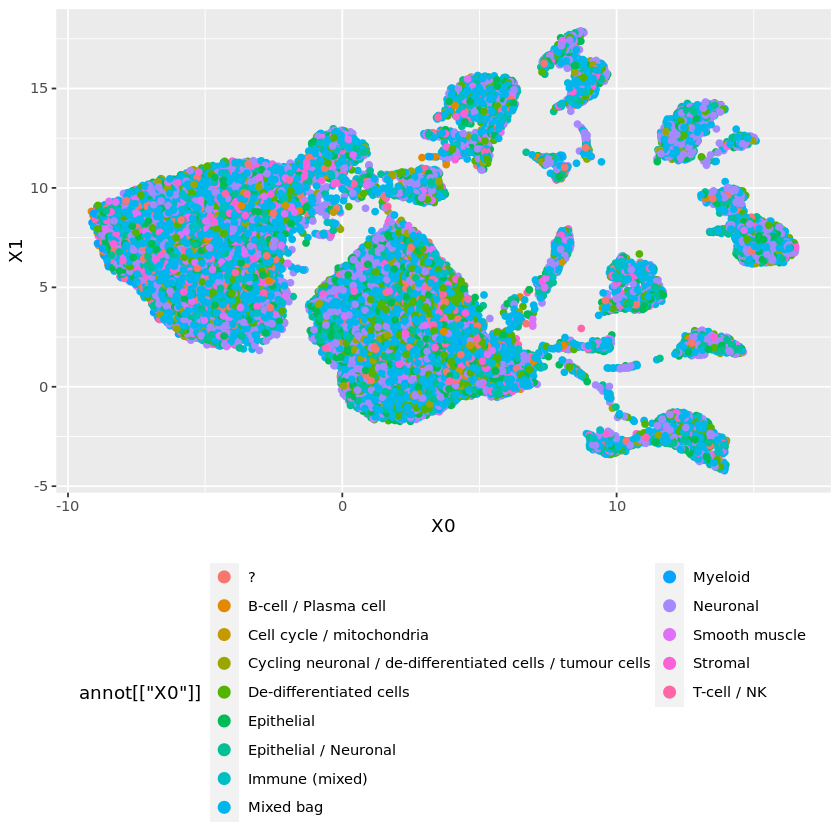

In [16]:
ggplot(scano_dense_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


In [59]:
raw <- read.csv("ribas/NSCL/NSCL_full_merged_NO_BATCH_pcs.csv")

In [17]:
raw_umap <- read.csv("ribas/NSCL/NSCL_full_raw_umap.csv")

In [60]:
umap_coords=raw[c("X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")]

labels <- scano_cells["orig.ident"]
names(labels) <- c('celltype')

res <- compute_lisi(umap_coords, labels, c("celltype"))

mean(res[['celltype']])

[1] 1.601161

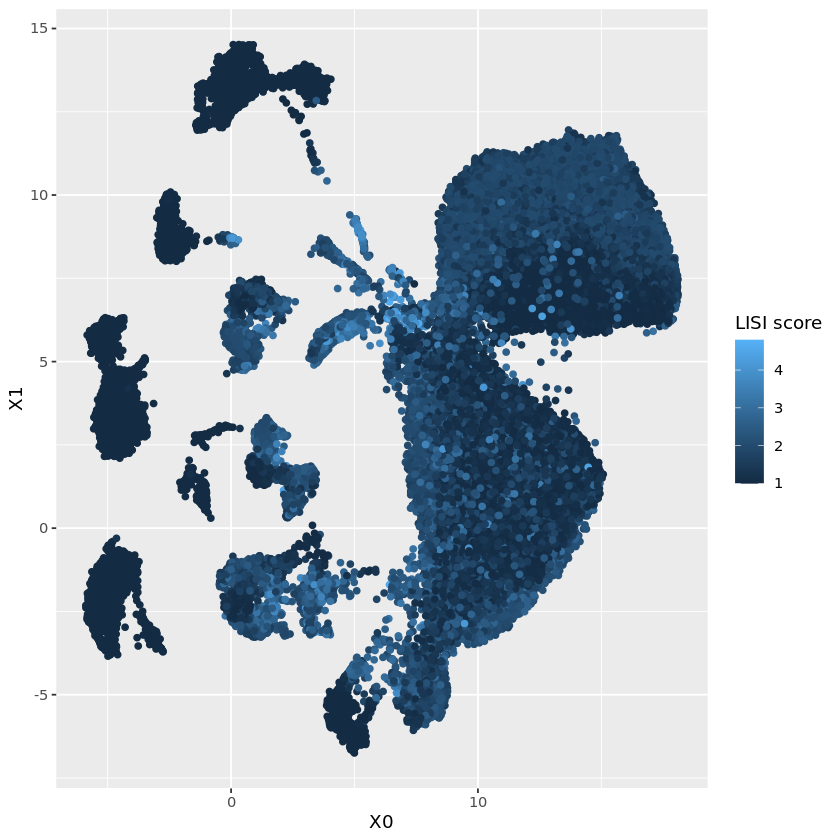

In [62]:
ggplot(raw_umap, aes(x=X0, y=X1,color=res[["celltype"]])) + 
  geom_point() + labs(colour = "LISI score") 


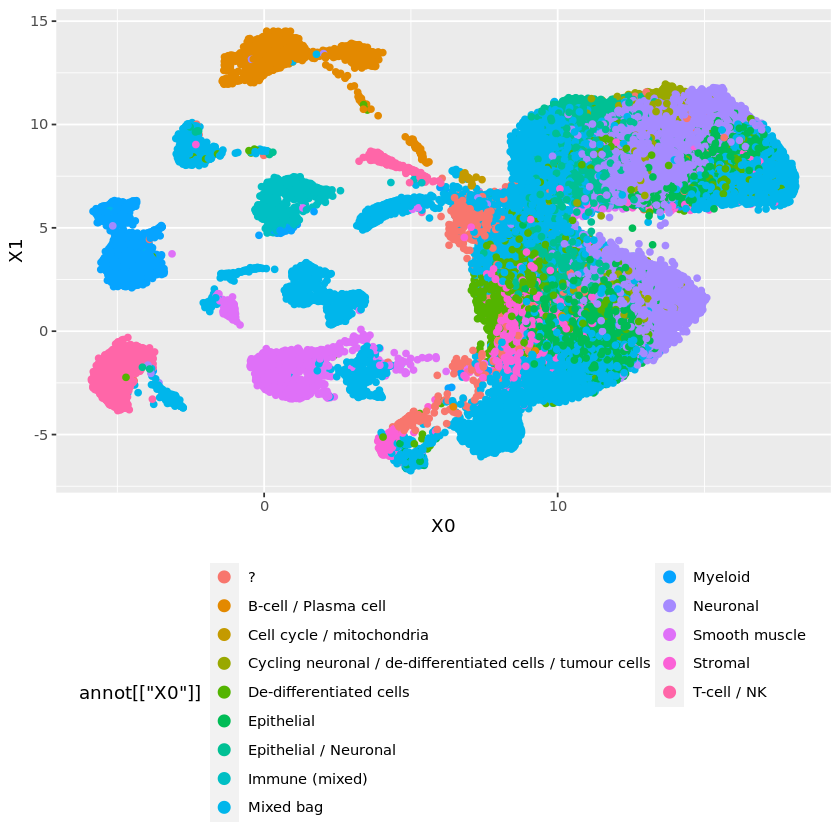

In [18]:
ggplot(raw_umap, aes(x=X0, y=X1,color=annot[["X0"]])) + geom_point() + theme(legend.position = "bottom")+guides(colour = guide_legend(nrow = 9, override.aes = list(size=3)))


### kBet

In [4]:
library(kBET)

Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”


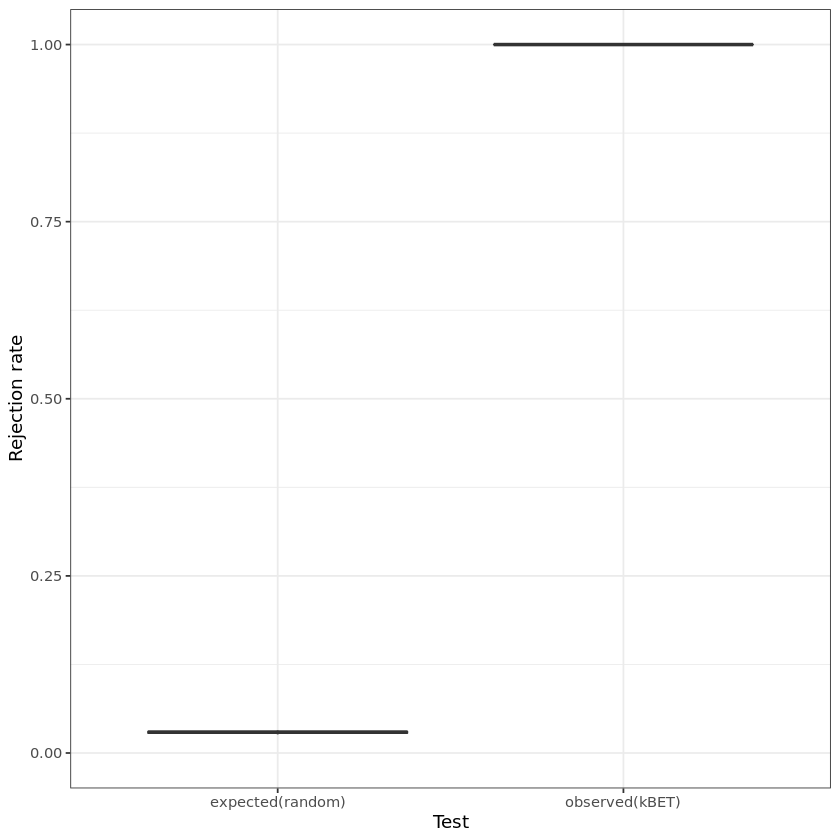

In [5]:
batch.estimate <- kBET(as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)]),NSCL_merged@meta.data$patient)

In [16]:
batch.estimate$stats

$kBET.expected
  [1] 0.02852583 0.03032116 0.03101935 0.02852583 0.02952324 0.02842609
  [7] 0.03042091 0.03072013 0.03042091 0.02742869 0.02802713 0.03032116
 [13] 0.02962298 0.02982246 0.03052065 0.02832635 0.03062039 0.02742869
 [19] 0.03062039 0.02982246 0.03091961 0.03062039 0.03101935 0.02932376
 [25] 0.02992220 0.03181728 0.02702972 0.02772791 0.02902454 0.02882505
 [31] 0.02922402 0.02762817 0.02852583 0.03002194 0.02932376 0.02932376
 [37] 0.02762817 0.02702972 0.02812687 0.02782765 0.02653102 0.02643128
 [43] 0.03052065 0.02802713 0.03062039 0.03052065 0.02912428 0.03091961
 [49] 0.02812687 0.02732894 0.03052065 0.02812687 0.02812687 0.02942350
 [55] 0.02722920 0.02822661 0.03121883 0.03121883 0.02902454 0.02952324
 [61] 0.03042091 0.02832635 0.03002194 0.02942350 0.02992220 0.02982246
 [67] 0.02762817 0.02623180 0.02842609 0.03042091 0.02882505 0.02902454
 [73] 0.02832635 0.02772791 0.03081987 0.02673050 0.02972272 0.02962298
 [79] 0.02882505 0.02812687 0.03002194 0.02892480 0.02942350 0.02792739
 [85] 0.02962298 0.02932376 0.03101935 0.03181728 0.02692998 0.02673050
 [91] 0.02852583 0.02643128 0.03181728 0.02952324 0.03032116 0.02902454
 [97] 0.02922402 0.02792739 0.02782765 0.03091961

$kBET.observed
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$kBET.signif
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [35]:
NSCL_merged@assays$mnn.reconstructed

Assay data with 8000 features for 33418 cells
Top 10 variable features:
 AP006222.2, AL645608.6, SAMD11, PLEKHN1, HES4, ISG15, AGRN, TNFRSF4,
SDF4, C1QTNF12 

In [27]:
scvi_dense <- read.csv("ribas/NSCL/NSCL_full_scvi_dense.csv")

In [20]:
scvi_cells <- read.csv("ribas/NSCL/NSCL_full_orig.ident.csv")

Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(knn) == "list") {:
“the condition has length > 1 and only the first element will be used”


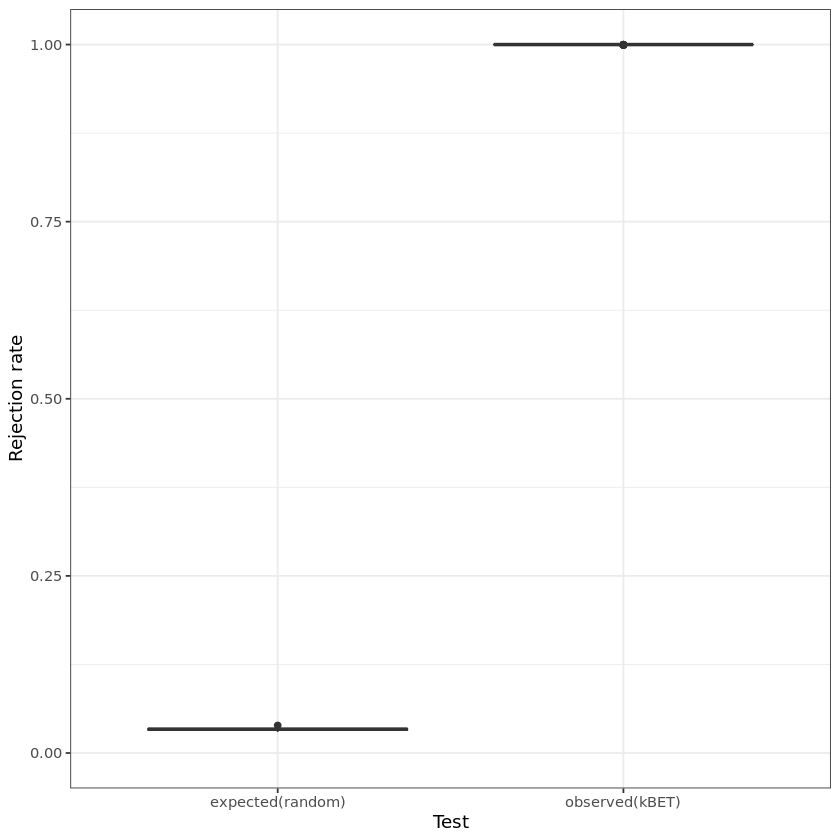

In [43]:
batch.estimate <- kBET(as.matrix(scvi_dense[c(colnames(scvi_dense)[2:8001])]),scvi_cells[['orig.ident']])

In [14]:
data <- as.matrix(NSCL_merged@assays$mnn.reconstructed[c(1:8000)])
batch <- NSCL_merged@meta.data$patient
pca.data <- prcomp(data, center=TRUE) #compute PCA representation of the data
batch.silhouette <- batch_sil(pca.data, batch)
batch.pca <- pcRegression(pca.data, batch)

Warning message in silhouette(as.numeric(batch), dd):
“NAs introduced by coercion”


ERROR: Error in if (!all(x == round(x))) stop("'x' must only have integer codes"): missing value where TRUE/FALSE needed


In [22]:
NSCL_merged_split <- SplitObject(NSCL_merged,split.by='orig.ident')

In [39]:
sample <- as.data.frame(NSCL_merged_split[1])
batch <- names(sample)
subset_size <- 0.1 #subsample to 10% of the data
subset_id <- sample.int(n = length(batch), size = floor(subset_size * length(batch)), replace=FALSE)

In [37]:
nrow(sample)

NULL

In [41]:
sample <- as.matrix(NSCL_merged_split[1])